# Step 1: Imports

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
# Read datafile
df = pd.read_csv('data.csv')

In [5]:
# Cleaning the column_names
df.columns = df.columns.str.strip()

# 2. Explore Data

In [6]:
# Get the size of the dataframe
df.shape

(6819, 96)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [8]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
# Checking for missing values
df.isna().sum().max()

0

In [10]:
# Checking for duplicates()
df.duplicated().sum()

0

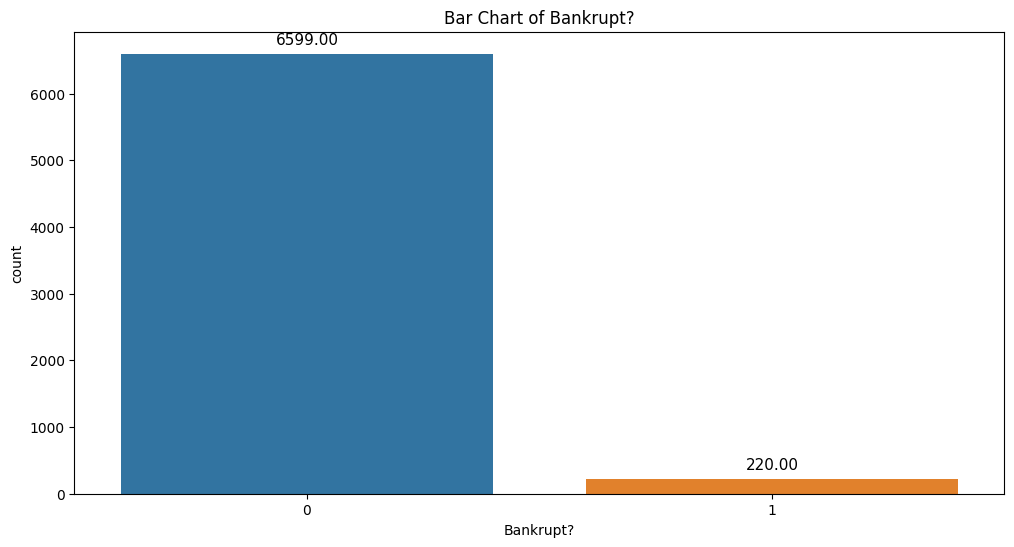

In [11]:
# Bar chart of Bankrupt?

# Bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(x=df['Bankrupt?'])

plt.title('Bar Chart of Bankrupt?')

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center',
                      va = 'center',
                      fontsize = 11,
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()

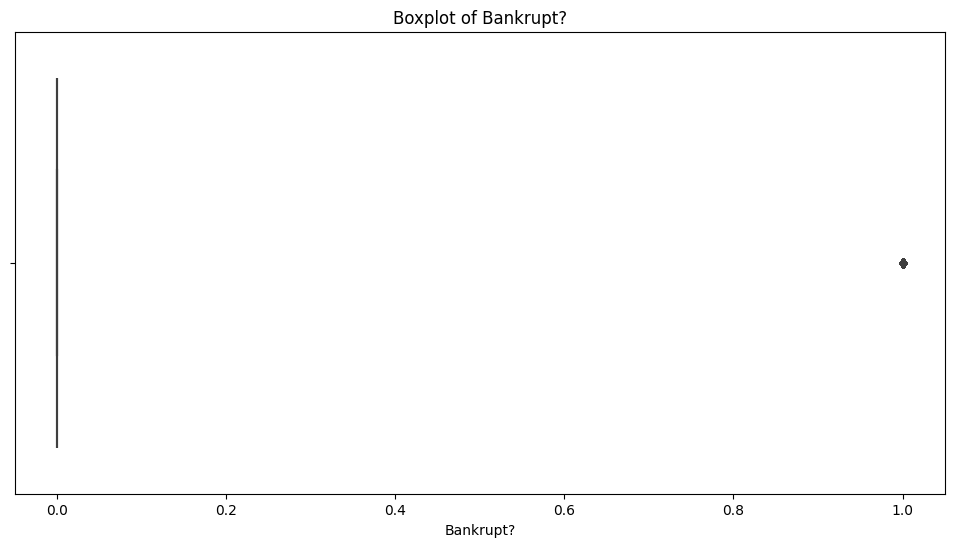

In [12]:
# Boxplot of Bankrupt?
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Bankrupt?'])
plt.title('Boxplot of Bankrupt?')
plt.show()

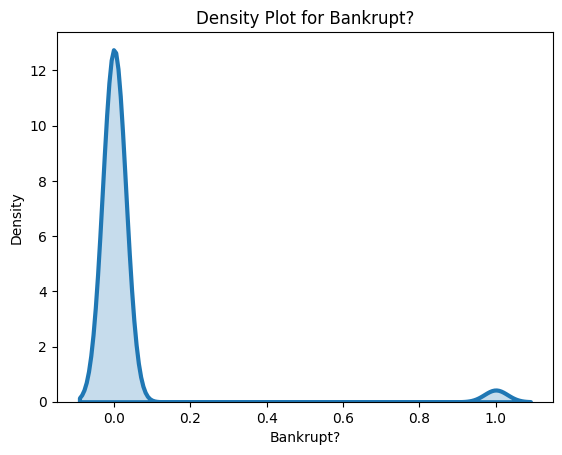

In [13]:
# Plot Density Plot
sns.distplot(df['Bankrupt?'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Density Plot for Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Density')

plt.show()

In [14]:
# Identify the features that have the highest correlation with Bankrupt?

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Bankrupt?' with other features
correlation_with_bankrupt = correlation_matrix['Bankrupt?']

# Get absolute values of correlation for comparison
absolute_correlation_with_bankrupt = correlation_with_bankrupt.abs()

# Get the twenty features that have the highest correlation with 'Bankrupt?'
top_20_correlated_features = absolute_correlation_with_bankrupt.nlargest(21).drop('Bankrupt?', errors='ignore')

print(top_20_correlated_features)

Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                                       0.176543
Current Liability to Current Assets             

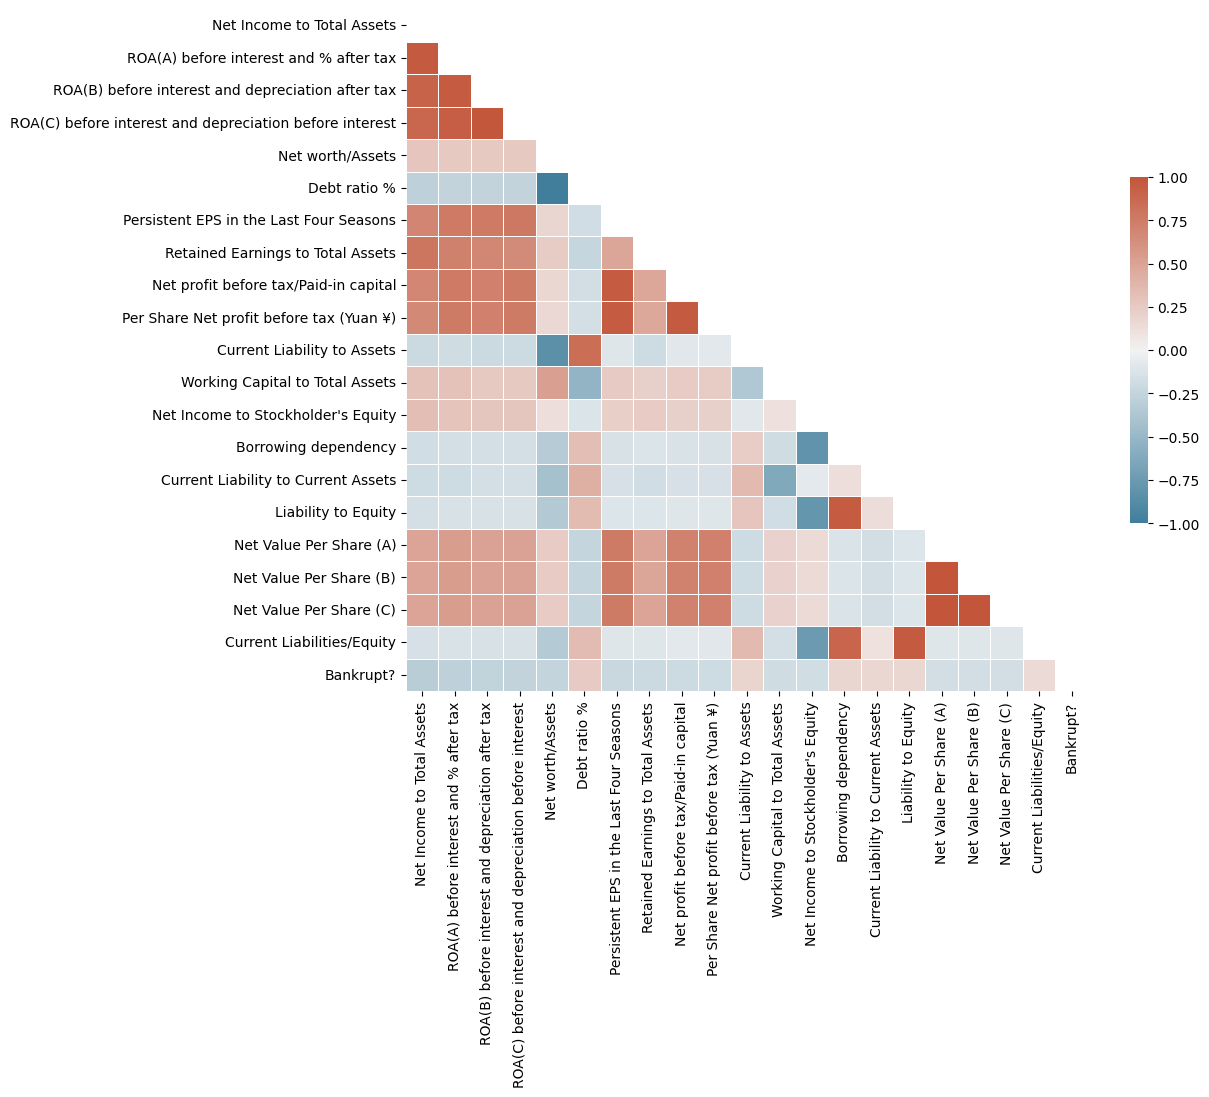

In [15]:
# Plot the heatmap
features_list = list(top_20_correlated_features.index) + ['Bankrupt?']

# Construct a DataFrame with wanted features only
df_subset = df[features_list]

# Compute the correlation matrix for the subset dataframe
correlation_matrix_subset = df_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_subset, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_subset, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

# 3. Address Multi-colinearity

In [16]:
# To avoid multi-colinearity, we identify the highly correlated features in df

# Calculate correlation matrix
corr_matrix = df.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Identify pairs with correlation above 0.95
pairs = [(column, row) for column in upper.columns for row in upper.index if abs(upper[column][row]) > 0.95]
# Prepare a list containing column pairs and their correlation
output = [(pair[0], pair[1], upper[pair[0]][pair[1]]) for pair in pairs]
# Create a DataFrame from the list
df_output = pd.DataFrame(output, columns=['Feature1', 'Feature2', 'Correlation'])
# Set pandas to display all columns in DataFrame
pd.set_option('display.expand_frame_repr', False)
# Print the output DataFrame
print(df_output)

                                             Feature1                                           Feature2  Correlation
0   ROA(B) before interest and depreciation after tax  ROA(C) before interest and depreciation before...     0.986849
1   ROA(B) before interest and depreciation after tax             ROA(A) before interest and % after tax     0.955741
2                         Realized Sales Gross Margin                             Operating Gross Margin     0.999518
3                         After-tax net Interest Rate                          Pre-tax net Interest Rate     0.986379
4                Continuous interest rate (after tax)                          Pre-tax net Interest Rate     0.993617
5                Continuous interest rate (after tax)                        After-tax net Interest Rate     0.984452
6                             Net Value Per Share (A)                            Net Value Per Share (B)     0.999342
7                             Net Value Per Share (C)   

In [17]:
# Drop features to avoid multi-colinearity
# Set the columns we want to drop
columns_to_drop = [
    "ROA(C) before interest and depreciation before interest",
    "ROA(A) before interest and % after tax",
    "Operating Gross Margin",
    "Pre-tax net Interest Rate",
    "After-tax net Interest Rate",
    "Net Value Per Share (B)",
    "Net Value Per Share (C)",
    "Persistent EPS in the Last Four Seasons",
    "After-tax Net Profit Growth Rate",
    "Debt ratio %",
    "Operating Profit Per Share (Yuan ¥)",
    "Persistent EPS in the Last Four Seasons",
    "Per Share Net profit before tax (Yuan ¥)",
    "Current Liabilities/Liability",
    "Current Liabilities/Equity",
    "Operating Gross Margin",
    "Realized Sales Gross Margin",
    "Borrowing dependency",
    "Current Liabilities/Equity",
    "Current Liability to Equity"
]

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

In [18]:
# Identify the features that have the hgihest correlation with Bankrupt?

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Bankrupt?' with other features
correlation_with_bankrupt = correlation_matrix['Bankrupt?']

# Get absolute values of correlation for comparison
absolute_correlation_with_bankrupt = correlation_with_bankrupt.abs()

# Get the twenty features that have the highest correlation with 'Bankrupt?'
top_20_correlated_features = absolute_correlation_with_bankrupt.nlargest(21).drop('Bankrupt?', errors='ignore')

print(top_20_correlated_features)

Net Income to Total Assets                           0.315457
ROA(B) before interest and depreciation after tax    0.273051
Net worth/Assets                                     0.250161
Retained Earnings to Total Assets                    0.217779
Net profit before tax/Paid-in capital                0.207857
Current Liability to Assets                          0.194494
Working Capital to Total Assets                      0.193083
Net Income to Stockholder's Equity                   0.180987
Current Liability to Current Assets                  0.171306
Liability to Equity                                  0.166812
Net Value Per Share (A)                              0.165465
Working Capital/Equity                               0.147221
Operating profit/Paid-in capital                     0.141111
Liability-Assets Flag                                0.139212
Total expense/Assets                                 0.139049
Equity to Long-term Liability                        0.139014
CFO to A

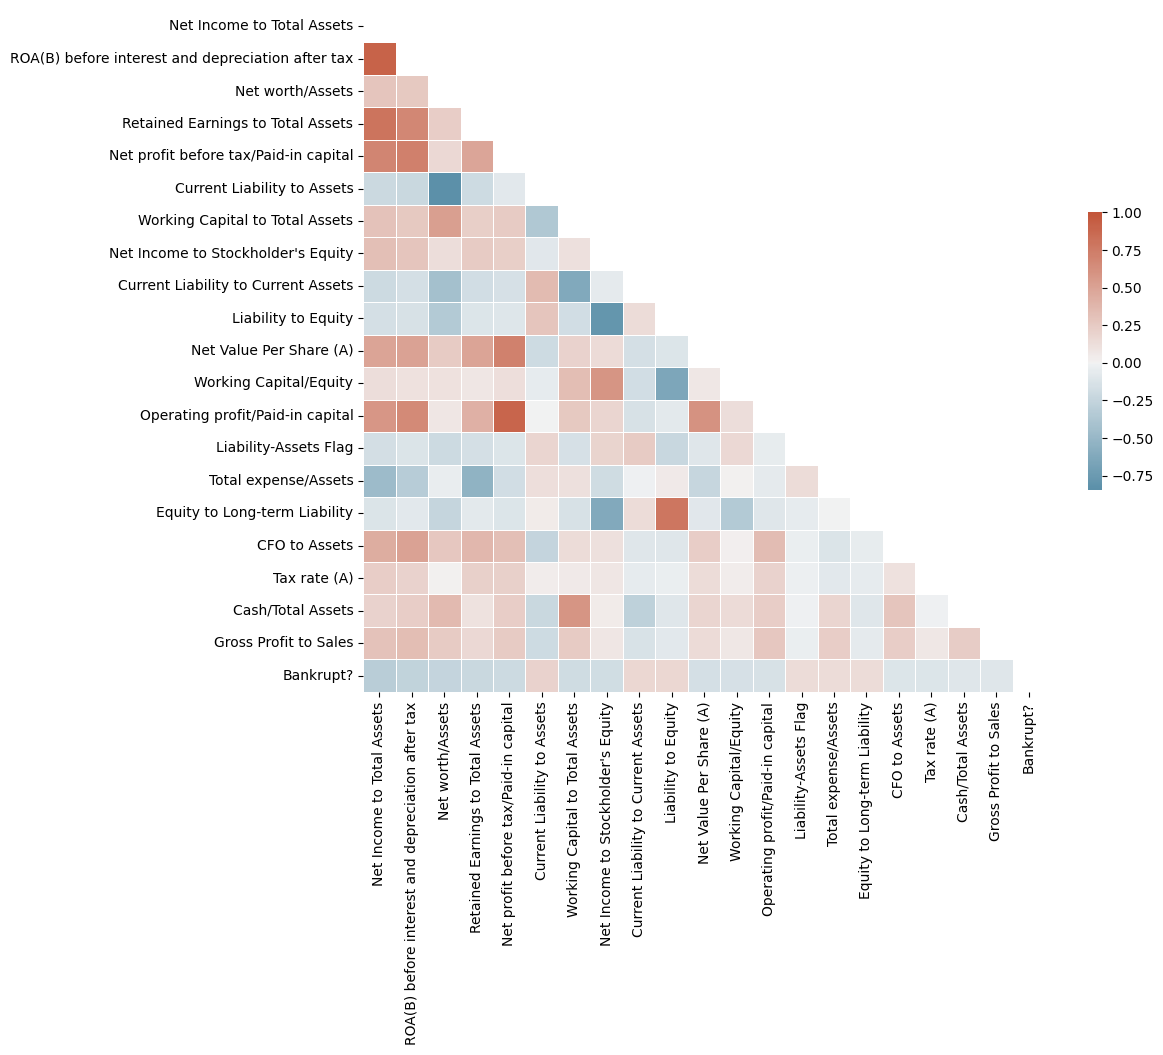

In [19]:
# Plot the heatmap
features_list = list(top_20_correlated_features.index) + ['Bankrupt?']

# Construct a DataFrame with wanted features only
df_subset = df[features_list]

# Compute the correlation matrix for the subset dataframe
correlation_matrix_subset = df_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_subset, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_subset, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot=True)
plt.show()

# 4. Explore Most-Important Features

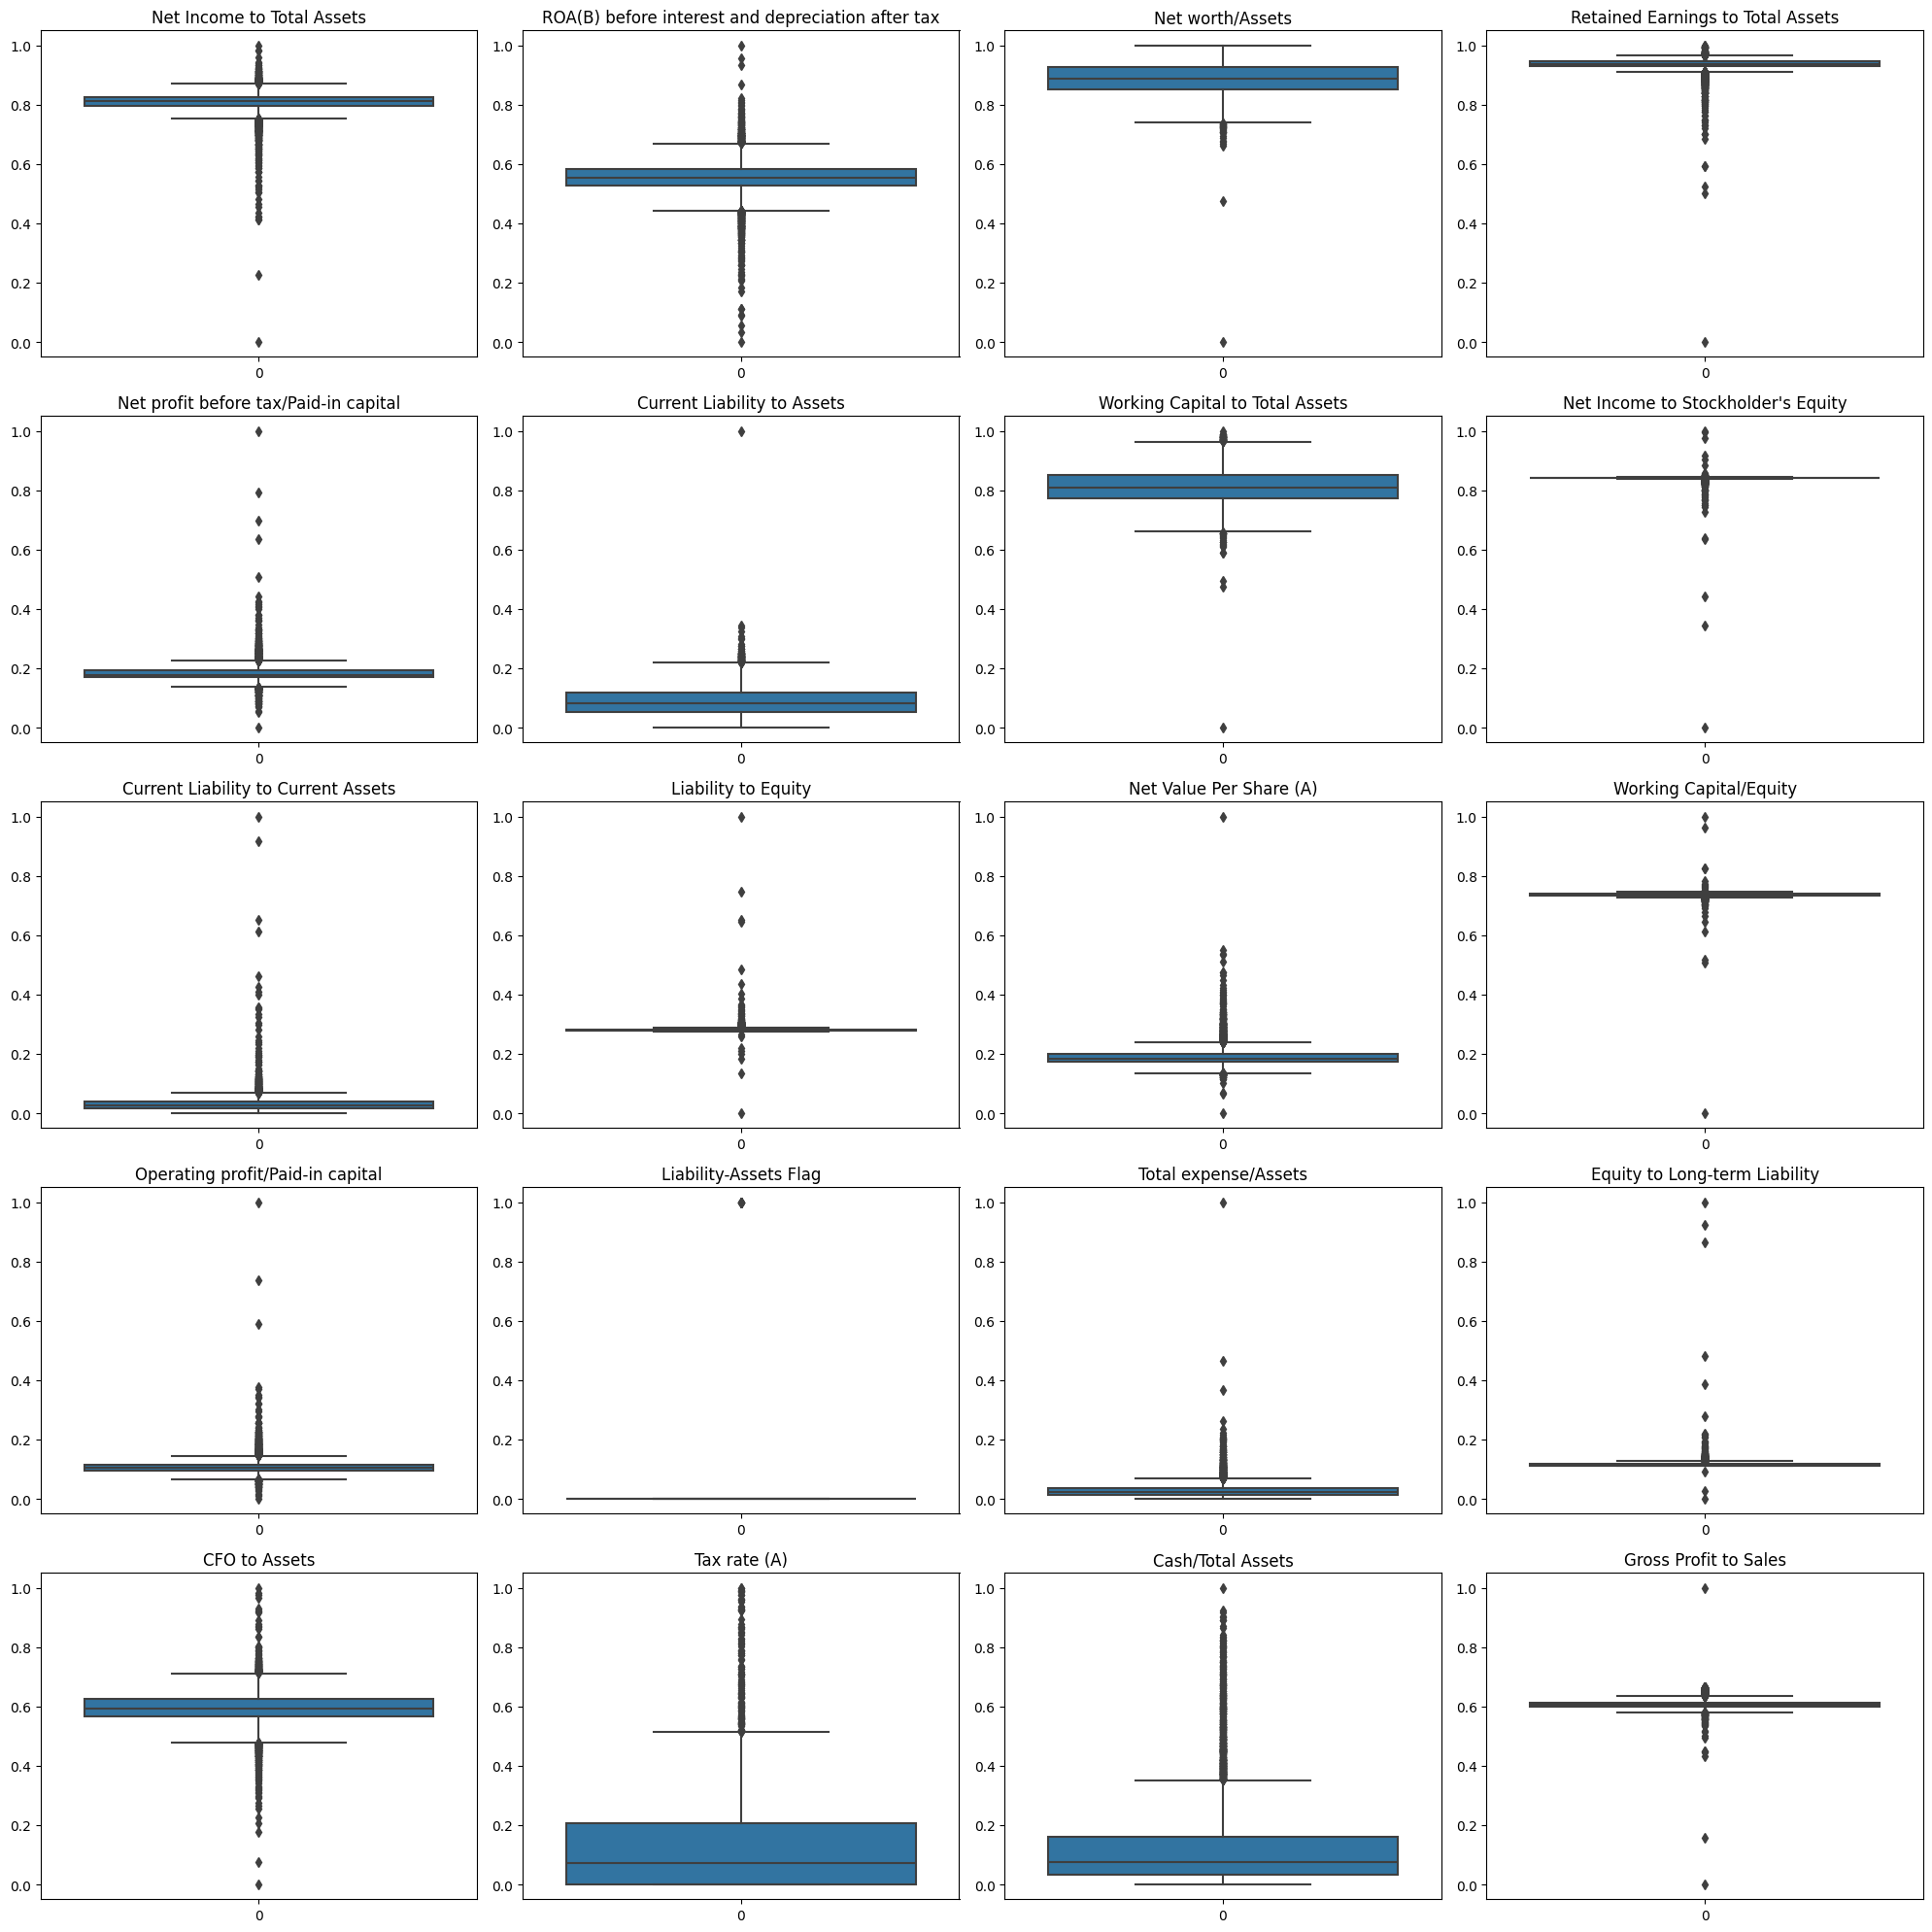

In [20]:
# Plot the boxplots

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# assuming that top_ten_correlated_features index contains feature names
features = top_20_correlated_features.index

for i, feature in enumerate(features):
    # calculate row and column index
    row = i // 4
    col = i % 4

    # plot boxplot on corresponding subplot
    sns.boxplot(df[feature], ax=axs[row, col])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

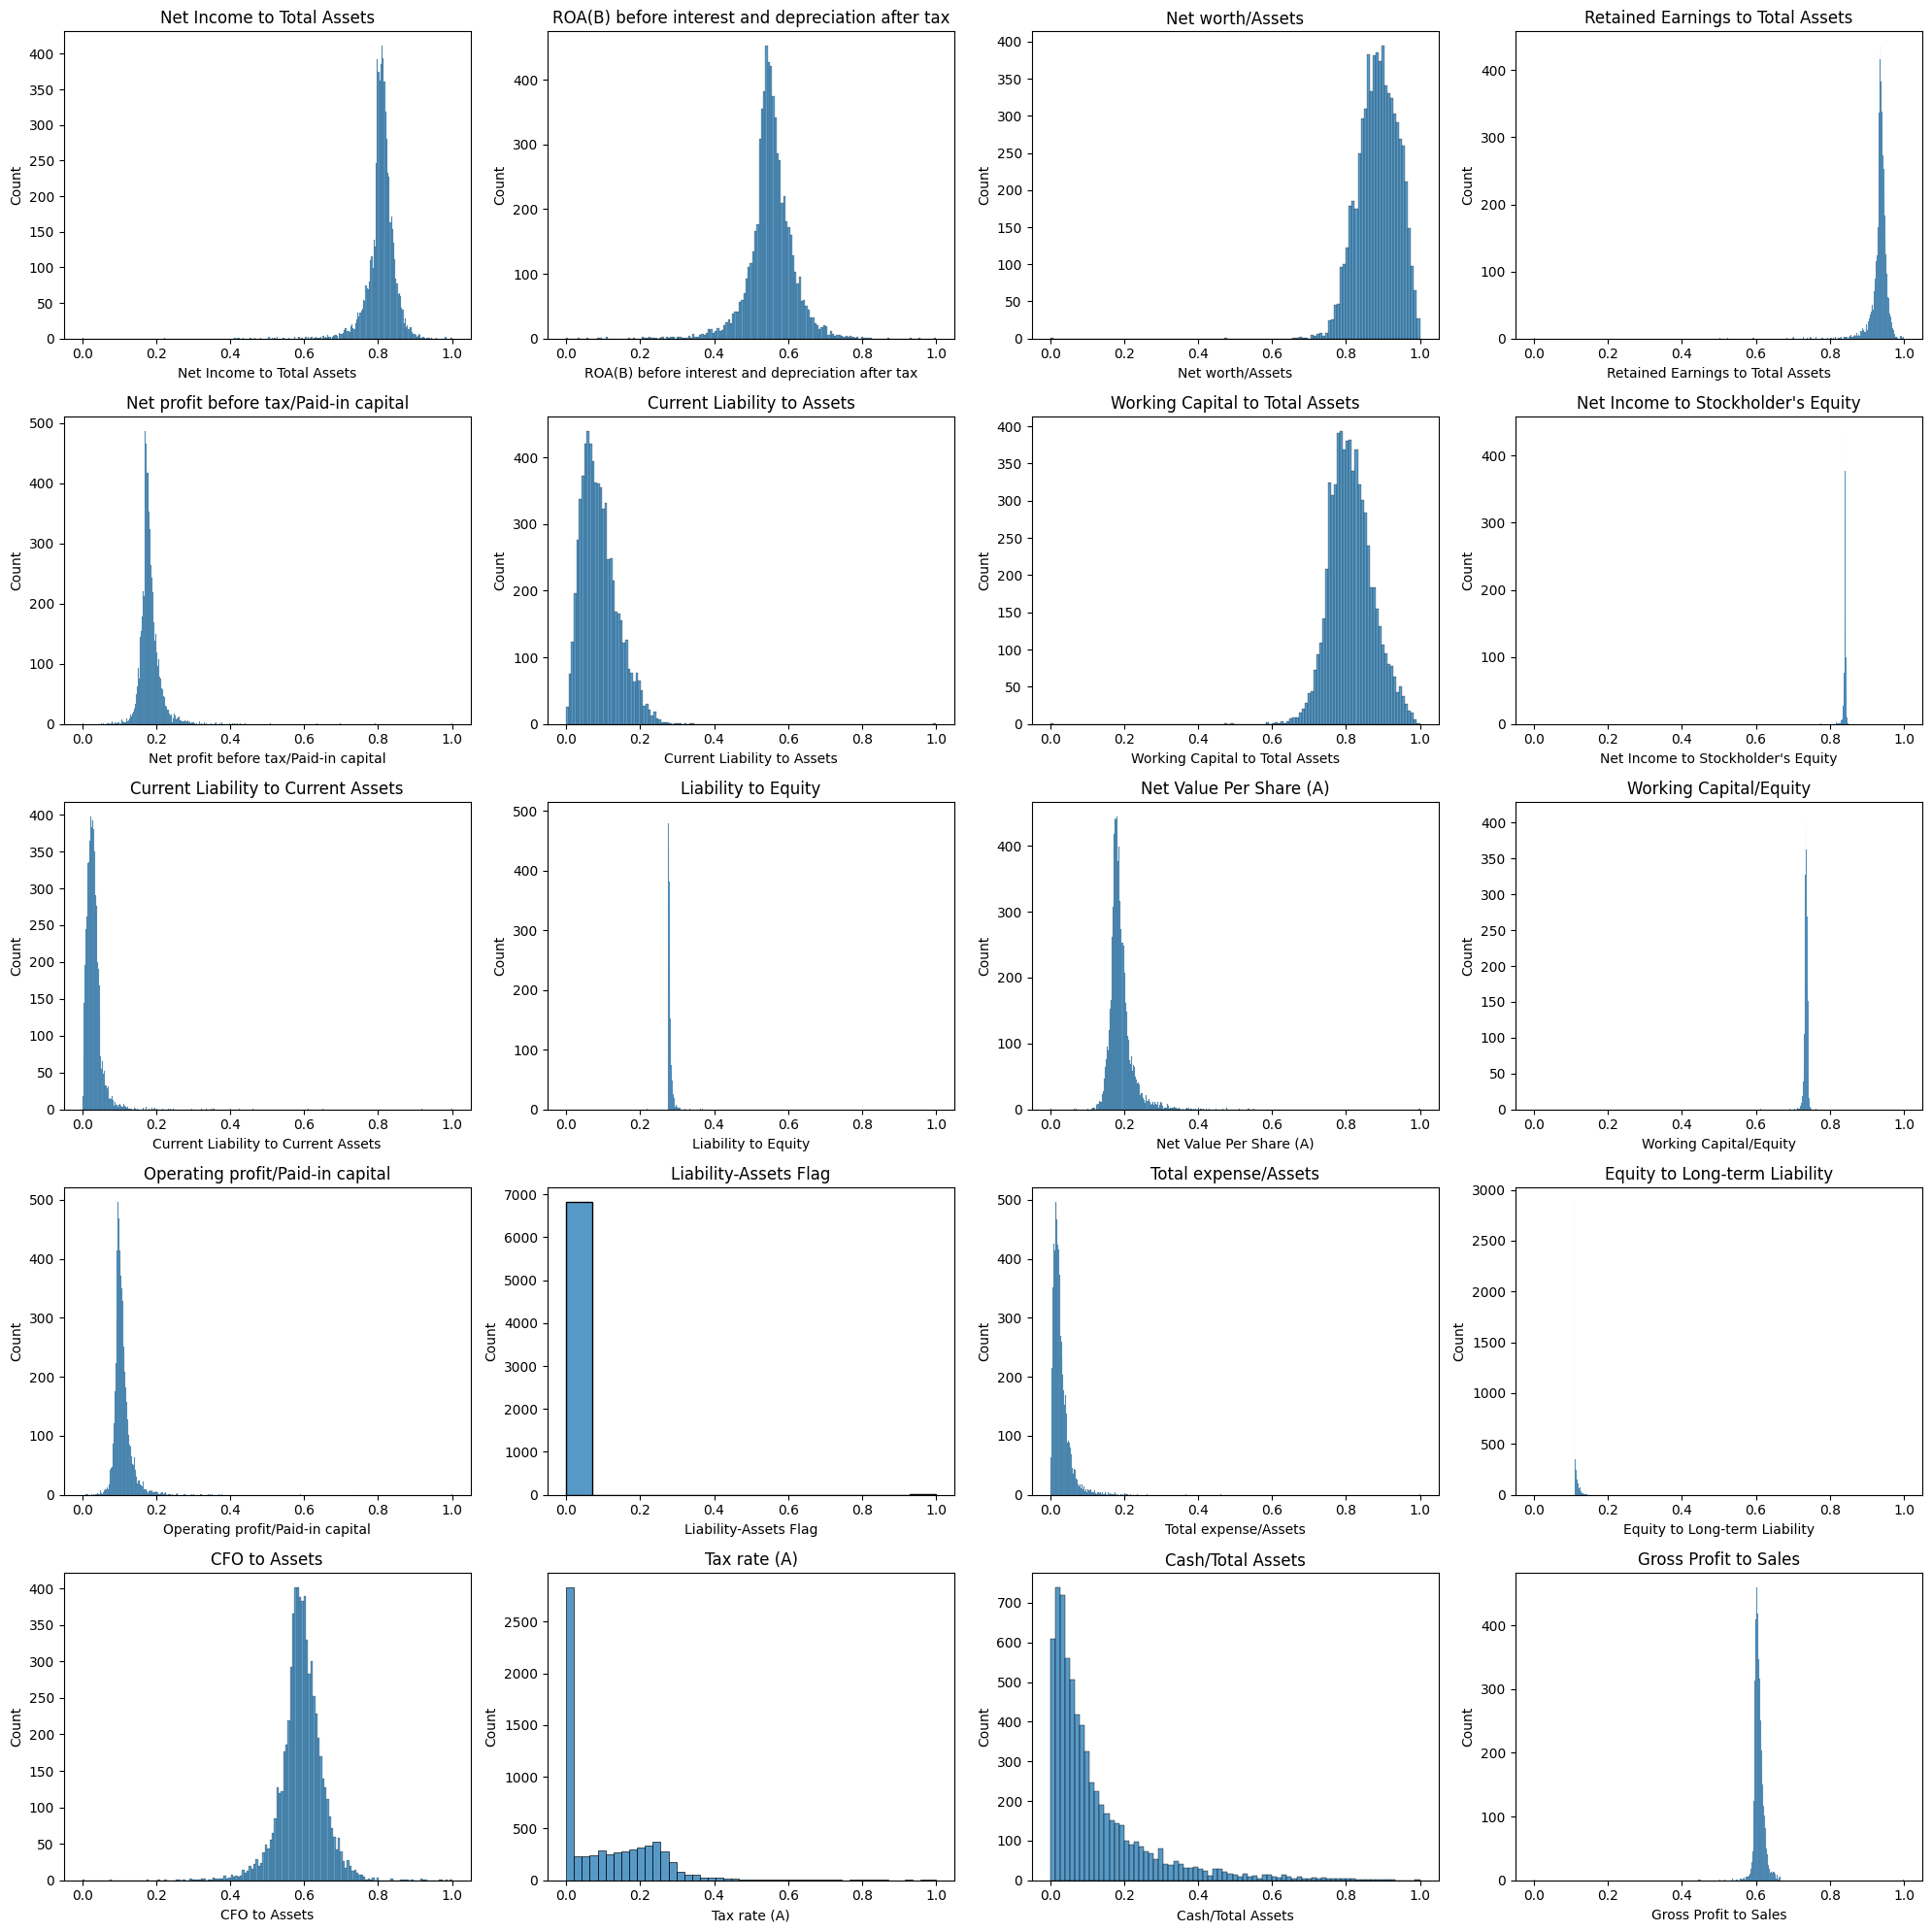

In [21]:
# Plot the distribution plots of top_ten_correlated_features
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# assuming that top_ten_correlated_features index contains feature names
features = top_20_correlated_features.index

for i, feature in enumerate(features):
     # calculate row and column index
    row = i // 4
    col = i % 4

    # plot distribution on corresponding subplot
    sns.histplot(df[feature], ax=axs[row, col])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

# 5. Pre-work for Modelling

In [22]:
# Define the features and target variable for Modelling
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform validation data
X_val_scaled = scaler.transform(X_val)  # Note we only 'transform' the validation set, not 'fit_transform'
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Now you can proceed with your training using: X_train_smote, y_train_smote, X_val_scaled and y_val

Our dataset showcases a significant class imbalance with a vast majority of cases being non-bankrupt (6599) and a small minority being bankrupt (220). In such scenarios, logistic regression models tend to be biased towards the majority class, leading to poor classification performance on the minority class. SMOTE (Synthetic Minority Over-sampling Technique) is justified in this context as it generates synthetic samples for the minority class, helping to balance the dataset. This balance allows the logistic regression model to learn a more generalized decision boundary, improving its ability to correctly identify cases of bankruptcy, which is critical for the model's predictive performance. By enhancing the representation of the minority class, SMOTE helps in improving the sensitivity (recall) and precision of the model, ensuring that both classes are predicted more accurately, rather than the model overwhelmingly predicting the majority class.

# 6. Modelling

In [24]:
# Function for plotting ROC and AUC plots
def plot_roc_pr_curves(y_val, y_val_prob, model_name):
    lw = 2

    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'ROC curve - {model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
    pr_auc = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, color='darkblue',
             lw=lw, label=f'PR curve - {model_name} (AUC = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Best accuracy score (on the training dataset): 0.9839197881195613
Accuracy:  0.9618768328445748
Precision:  0.49019607843137253
Recall:  0.49019607843137253
F1 Score:  0.49019607843137253


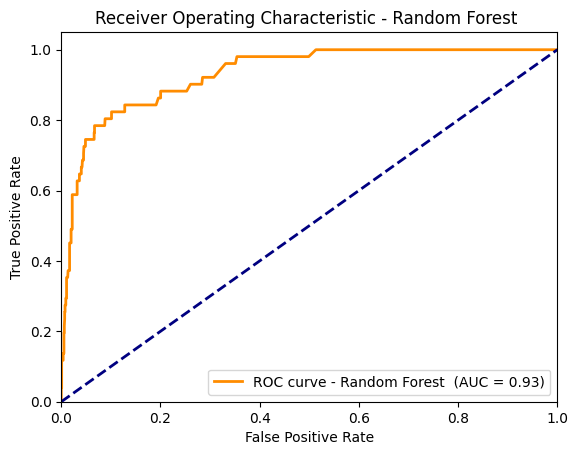

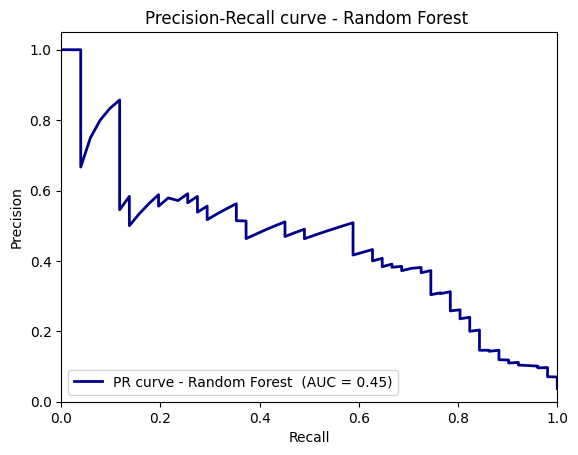

In [25]:
## Random Forest Classifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [75, 100, 125],    # number of trees in the forest
    'max_depth': [None, 25, 30, 40],   # maximum depth of the tree
    'min_samples_split': [5, 10, 15],  # minimum number of samples required to split an internal node
    'max_features' : ['auto', 'sqrt', 'log2'],   # the number of features to consider when looking for the best split
    'random_state' : [42],    # to make output consistent across multiple function calls
    'class_weight' : ['balanced','balanced_subsample'],   # weights associated with classes
    'criterion' : ['gini', 'entropy'],  # function to measure the quality of a split
    'bootstrap' : [True, False] # whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best accuracy score (on the training dataset):', best_score)

# Use the best estimator to make predictions on the validation set
brf_model = grid_search.best_estimator_
y_val_pred = brf_model.predict(X_val_scaled)


# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)


# Calculate the probabilities of the predictions
y_val_prob = brf_model.predict_proba(X_val_scaled)[:,1]

# Call the funciton to plot the plots
plot_roc_pr_curves(y_val, y_val_prob, "Random Forest ")

The Receiver Operating Characteristic (ROC) curve for this model displays an area under the curve (AUC) of 0.93, signifying a strong discriminative ability of the model to correctly classify the positive cases. This performance is substantially better than random guessing, which would result in an AUC of 0.50, indicating that the model has a high true positive rate while maintaining a low false positive rate.

In contrast, the Precision-Recall (PR) curve has an AUC of 0.45, which is relatively low and signals that the model is not as effective when it comes to precision and recall. The precision of the model is 0.4902, suggesting that when the model predicts a positive class, it is accurate less than half the time. This level of precision can result in a high number of false positives, which may be costly or undesirable depending on the application.

The recall value, also at 0.4902, means the model identifies 49.02% of all actual positive cases. This indicates that the model is capable of detecting nearly half of the positive instances but also misses a substantial portion, which could be critical if the positive class is of particular importance.

The model's accuracy is high at approximately 0.9619, yet this figure may be somewhat deceptive. High accuracy can occur in imbalanced datasets where one class dominates, and it does not necessarily mean the model is effective at classifying the positive class correctly.

Finally, the F1 Score, a measure that balances precision and recall, is 0.4902. This metric confirms the challenges seen in the precision and recall values and underscores the model's moderate effectiveness in classifying the positive class accurately. The identical values for precision, recall, and F1 score suggest a balance between the ability to identify positive cases and the accuracy of these identifications, but it also highlights the need for improvement to enhance the model's performance.

Best parameters: {'loss': 'exponential', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 250, 'random_state': 42}
Best accuracy score: 0.9863791146424518
Accuracy:  0.9596774193548387
Precision:  0.46
Recall:  0.45098039215686275
F1 Score:  0.45544554455445546


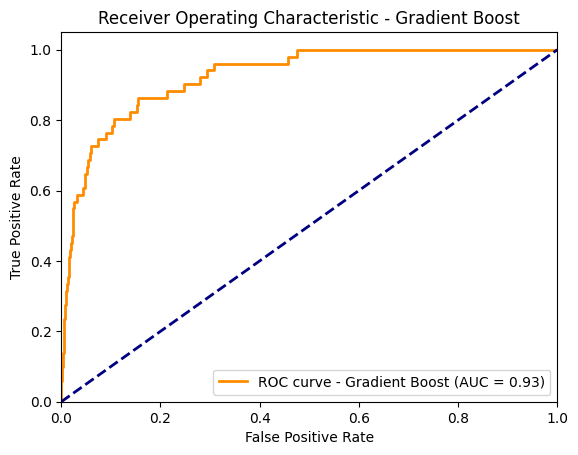

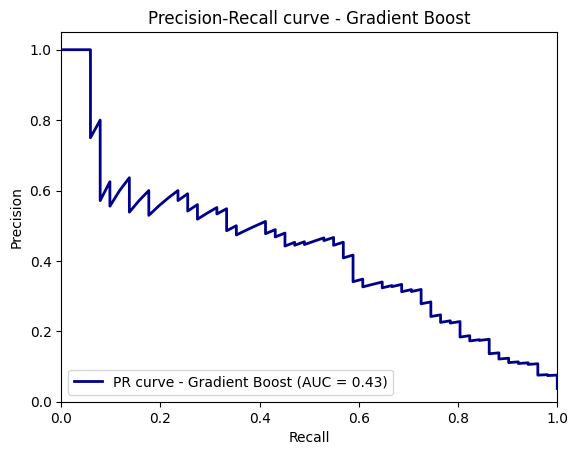

In [26]:
#  Gradient Boost Classifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [150, 200, 250],    # number of boosting stages to perform
    'max_depth': [None, 2, 5, 10],   # maximum depth of the individual estimators
    'min_samples_split': [2, 5, 7],   # minimum number of samples required to split an internal node
    'max_features' : ['auto', 'sqrt', 'log2'],   # the number of features to consider when looking for the best split
    'random_state' : [42],  # to make output consistent across multiple function calls
    'loss' : ['deviance', 'exponential'] # loss function to be optimized
}

# Initialize the Gradient Boosting Classifier
gbt = GradientBoostingClassifier()

# Initialize the grid search model
grid_search = GridSearchCV(estimator=gbt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best accuracy score:', best_score)

# Use the best estimator to make predictions on the validation set
bgb_model = grid_search.best_estimator_
y_val_pred = bgb_model.predict(X_val_scaled)

# Use the best estimator to make predictions on the validation set

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)


# Calculate the probabilities of the predictions
y_val_prob = bgb_model.predict_proba(X_val_scaled)[:,1]
# Plot the plots
plot_roc_pr_curves(y_val, y_val_prob, "Gradient Boost")


The Receiver Operating Characteristic (ROC) curve for this model displays an area under the curve (AUC) of 0.93, which indicates a strong ability to discriminate between the positive and negative classes, significantly better than random guessing, which would have an AUC of 0.50. This suggests that the model's discriminative ability to correctly classify the positive cases is quite good.

The Precision-Recall (PR) chart, however, shows a lower AUC of 0.43, suggesting that the model has room for improvement in terms of precision and recall. This is corroborated by the model's precision of 0.5217, indicating that when the model predicts a positive outcome, it is correct about 52.17% of the time. This level of precision may lead to a considerable number of false positives.

Furthermore, the recall of the model is 0.4706, which means it identifies about 47.06% of all actual positive cases. This moderate recall suggests that the model is missing a significant number of positive instances.

Despite these challenges, the model achieves an accuracy of approximately 0.964, which might be misleading as it does not capture the model's struggles with precision and recall — a common issue in datasets with class imbalance where accuracy is not the most informative metric.

Finally, the F1 Score, which is the harmonic mean of precision and recall, is at 0.4948. This score, being below 0.50, is indicative of the model's inadequate performance in precisely and reliably classifying the positive class.

Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best accuracy score: 0.9859061672342037
Accuracy:  0.9596774193548387
Precision:  0.46
Recall:  0.45098039215686275
F1 Score:  0.45544554455445546


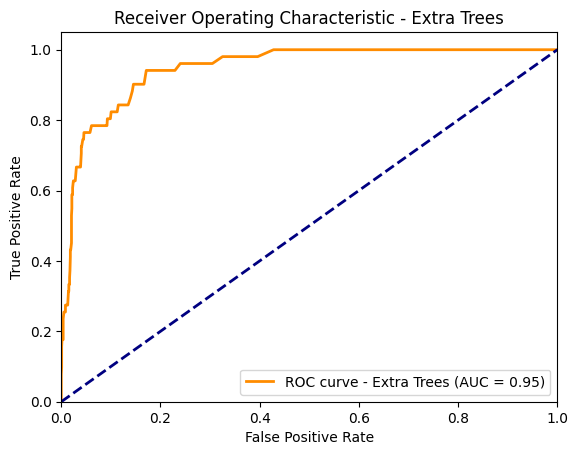

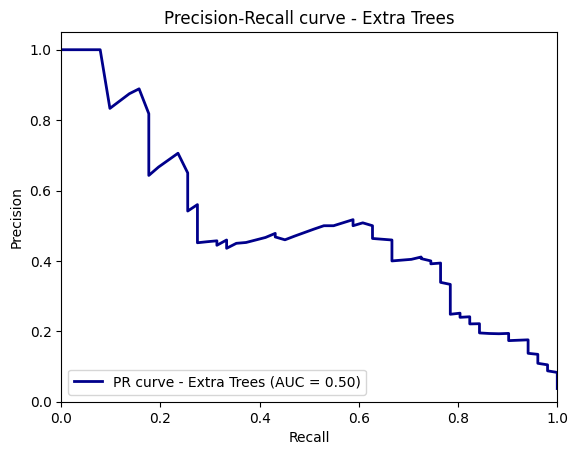

In [27]:
## Extra Trees Classifier

param_grid = {
    'n_estimators': [150, 200, 250],    # number of trees in the forest
    'max_depth': [None, 2, 5, 10],   # maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 7],   # minimum number of samples required to split an internal node
    'max_features' : ['auto', 'sqrt', 'log2'],   # the number of features to consider when looking for the best split
    'random_state' : [42],   # to make output consistent across multiple function calls
    'class_weight' : ['balanced','balanced_subsample'],   # weights associated with classes. 
    'criterion' : ['gini', 'entropy'],  # function to measure the quality of a split
    'bootstrap' : [True, False] # whether bootstrap samples are used when building trees
}

# Initialize the Extra Trees Classifier
et = ExtraTreesClassifier()

# Initialize the grid search model
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best accuracy score:', best_score)

# Use the best estimator to make predictions on the validation set
etb_model = grid_search.best_estimator_
y_val_pred = etb_model.predict(X_val_scaled)


# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

# Calculate the probabilities of the predictions
y_val_prob = etb_model.predict_proba(X_val_scaled)[:,1]
# Plot the plots
plot_roc_pr_curves(y_val, y_val_prob, "Extra Trees")


The Receiver Operating Characteristic (ROC) curve for this model shows an area under the curve (AUC) of 0.95, which is indicative of an excellent ability to distinguish between the positive and negative classes, far surpassing random guessing, which would have an AUC of 0.50. This high AUC value suggests that the model is very effective at correctly classifying the positive cases as compared to a random classifier.

The Precision-Recall (PR) chart, on the other hand, tells a different story with an AUC of 0.50, which is no better than random guessing. This low AUC on the PR curve is indicative of the model's poor performance in terms of both precision and recall. The precision of the model is 0.46, meaning that when the model predicts a positive outcome, it is correct less than half of the time, leading to a significant number of false positives.

Additionally, the model's recall is 0.4509, indicating that it correctly identifies only 45.09% of all actual positive cases. This suggests that the model is missing a substantial number of positive instances, which is concerning for a classifier, especially in contexts where detecting true positives is crucial.

Despite these shortcomings, the model has an accuracy of approximately 0.9597, which can be misleading because it does not account for the model's low precision and recall. This is a typical scenario with imbalanced datasets where a high accuracy doesn't necessarily mean good predictive performance, particularly for the minority class.

Lastly, the F1 Score of 0.4554, which balances precision and recall, is not impressive and reflects the model's suboptimal performance in accurately and consistently classifying the positive class. This score, combined with the low precision and recall, points towards the need for further model tuning or consideration of alternative modeling approaches to improve its predictive power for the positive class.

# 7. Evaluate Models

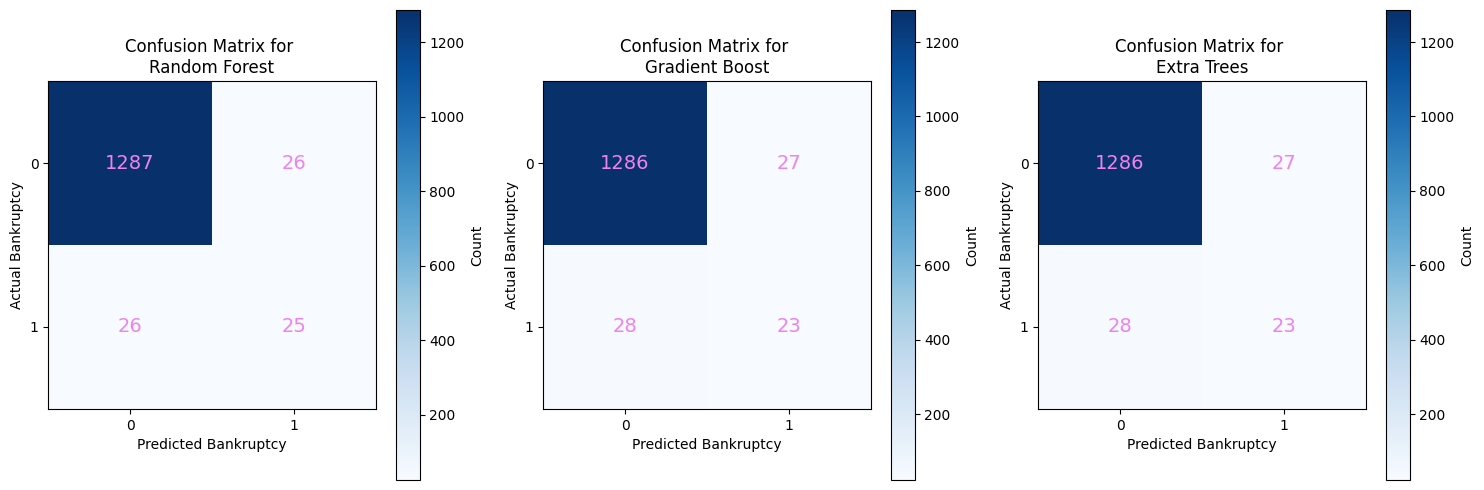

In [35]:
## Plot the Confusion Matrices

# Define the models and their names
models = [brf_model, bgb_model, etb_model]
model_names = ['Random Forest', 'Gradient Boost', 'Extra Trees']

# Make sure the figure is large enough
plt.figure(figsize=(15, 5))

# Iterate over the predictions and plot their confusion matrix
for idx, (model, model_name) in enumerate(zip(models, model_names)):
    # Get the confusion matrix
    cm = confusion_matrix(y_val, model.predict(X_val_scaled))

    # Create a subplot for each confusion matrix
    plt.subplot(1, 3, idx + 1)  # rows, columns, index

    # Visualize the confusion matrix using matshow
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for \n' + model_name)
    plt.colorbar(label='Count')
    plt.ylabel('Actual Bankruptcy')
    plt.xlabel('Predicted Bankruptcy')
    plt.xticks([0, 1])
    plt.yticks([0, 1])

    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="violet", fontsize=14)
    
    plt.grid(False)

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

Random Forest model exhibits a slightly better balance between false positives and false negatives, with both being equal at 26. Meanwhile, both Gradient Boost and Extra Trees models present a similar performance to each other, with 27 false positives and 28 false negatives, indicating a marginal increase in the false negatives compared to the Random Forest model.
In terms of true positives, all three models show relatively close numbers, with Random Forest at 25, and both Gradient Boost and Extra Trees at 23. This suggests that all models have a comparable ability to correctly identify bankruptcies. However, the true negatives, which represent the correct identification of non-bankruptcy cases, are highest for Random Forest at 1287, followed by both Gradient Boost and Extra Trees at 1286, which is an indication of a very slight edge for Random Forest in correctly predicting non-bankrupt cases.

These confusion matrices suggest that while all three models perform similarly, the Random Forest model has a minor advantage in terms of maintaining a balance between type I and type II errors (false positives and false negatives, respectively). This could potentially make it a more reliable choice for scenarios where it's important to maintain a balance between detecting bankruptcies and avoiding false bankruptcy alarms. However, the differences are marginal, and the choice between these models might also depend on other factors such as model interpretability, computational efficiency, and performance on other metrics not visible in the confusion matrices.